In [3]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
import seaborn as sns
# sns.set_style('whitegrid')
from datetime import datetime
import missingno as msno
import matplotlib.ticker as ticker

In [44]:
def load_data(col_to_exclude = None):
    '''
    This function loads the data into Jupyter Notebook
    Input:
    Output: Pandas DataFrame
    '''
    # Reset dir
    os.chdir('C:\\Users\\C092329\\Desktop\\GAO_Folder')
    
    path = os.getcwd() # get current working directory
    files = os.listdir(path + '\data')
    
    # initiate empty data frame
    df = pd.DataFrame()
    
    # read in dataset
    for filename in [f for f in files if f.endswith('xlsx')]:
        data = pd.read_excel(path + '\\data\\' + filename)
        df = df.append(data)
        print('{} successful loaded'.format(filename))
    
    # lower case all column names
    df.columns = [col.lower() for col in df.columns] 

    # Only keep relevant columns
    df.drop(col_to_exclude, axis = 1, inplace = True)
    
    return df

In [45]:
df = load_data(col_to_exclude = 'date_of_upload')

April 2019 - Generics Adherence Data.xlsx successful loaded
August 2018 - Generics Adherence Data.xlsx successful loaded
December 2018 - Generics Adherence Data.xlsx successful loaded
February 2019 - Generics Adherence Data.xlsx successful loaded
January 2019 - Generics Adherence Data.xlsx successful loaded
June 2019 - Generics Adherence Data.xlsx successful loaded
March 2019 - Generics Adherence Data.xlsx successful loaded
May 2019 - Generics Adherence Data.xlsx successful loaded
November 2018 - Generics Adherence Data.xlsx successful loaded
October 2018 - Generics Adherence Data.xlsx successful loaded
September 2018 - Generics Adherence Data.xlsx successful loaded


In [65]:
df.shape

(232512, 12)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
od day sply qty,232456.0,33.025269,14.916006,0.0,28.0,30.0,30.0,90.0


In [67]:
df.dtypes

timestamp_of_start                              object
c# finance ship date                    datetime64[ns]
next exhaust date - group level         datetime64[ns]
drug abbr nm                                    object
next exhaust date type - group level            object
next exhaust days - group level                 object
od day sply qty                                float64
ptnt id                                         object
store_nbr                                       object
store_nm                                        object
status                                          object
disposition                                     object
dtype: object

In [50]:
df.head()

,timestamp_of_start,c# finance ship date,next exhaust date - group level,drug abbr nm,next exhaust date type - group level,next exhaust days - group level,od day sply qty,ptnt id,store_nbr,store_nm,status,disposition
0,2019-04-01 08:19:00,2019-02-28,2019-03-29,GLATOPA,Post-Exhaust,1,28.0,3604516,1703,REDLANDS,Order Not Scheduled ...,Unable to Reach Patient ...
1,2019-04-01 08:03:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28.0,4531884,1702,LENEXA,I Scheduled the Order ...,...
2,2019-04-01 07:30:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28.0,3985037,2921,MONROEVILLE,Order Not Scheduled ...,Clinical Decision ...
3,2019-04-01 07:05:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28.0,4576331,1702,LENEXA,Order Not Scheduled ...,Unable to Reach Patient ...
4,2019-04-01 07:11:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28.0,2936622,NaN,FLOWER MOUND,Order Not Scheduled ...,Unable to Reach Patient ...


#### Check for missing values

In [ ]:
def plot_missing(df):
    
    fig, ax = plt.subplots(figsize = (15,8))
    miss = df.apply(lambda x: x.isnull().sum() / len(df)).sort_values(ascending = False)

    # Formatting ax
    ax = sns.barplot(y = miss.values, x = miss.index)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2%'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_ylim(0,1)  
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    ax.set_ylabel('Percentage of Missing')

    # formatting ax2
    ax2 = ax.twinx()
    ax2.set_ylim(0, len(df))
    ax2.set_ylabel('Count of Missing')

    # Use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10000))
    ax2.set_yticklabels(['{:,.0f}K'.format(x/1000) for x in ax2.get_yticks()])

    plt.title('Missing Value')
    sns.despine()
    plt.show()

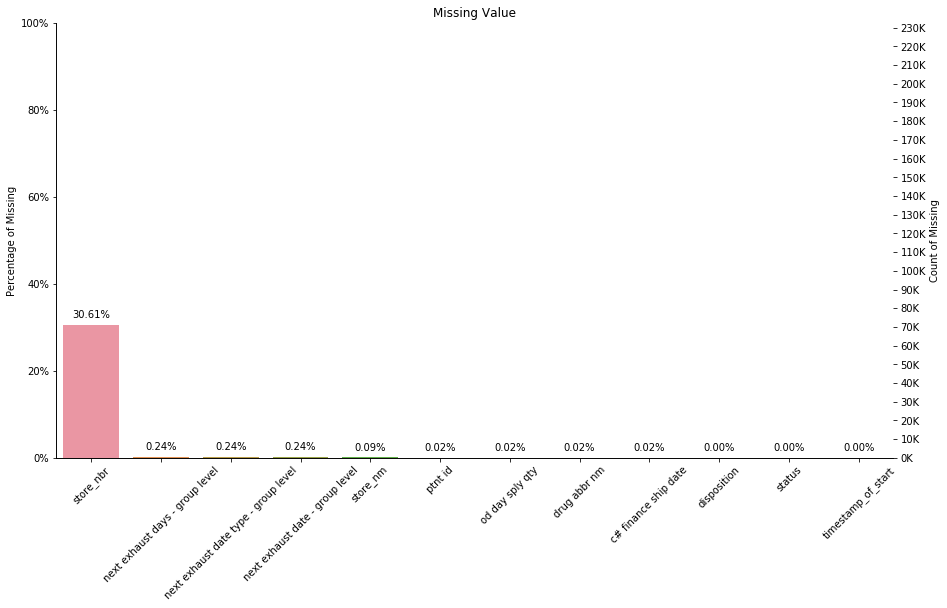

In [69]:
plot_missing(df)

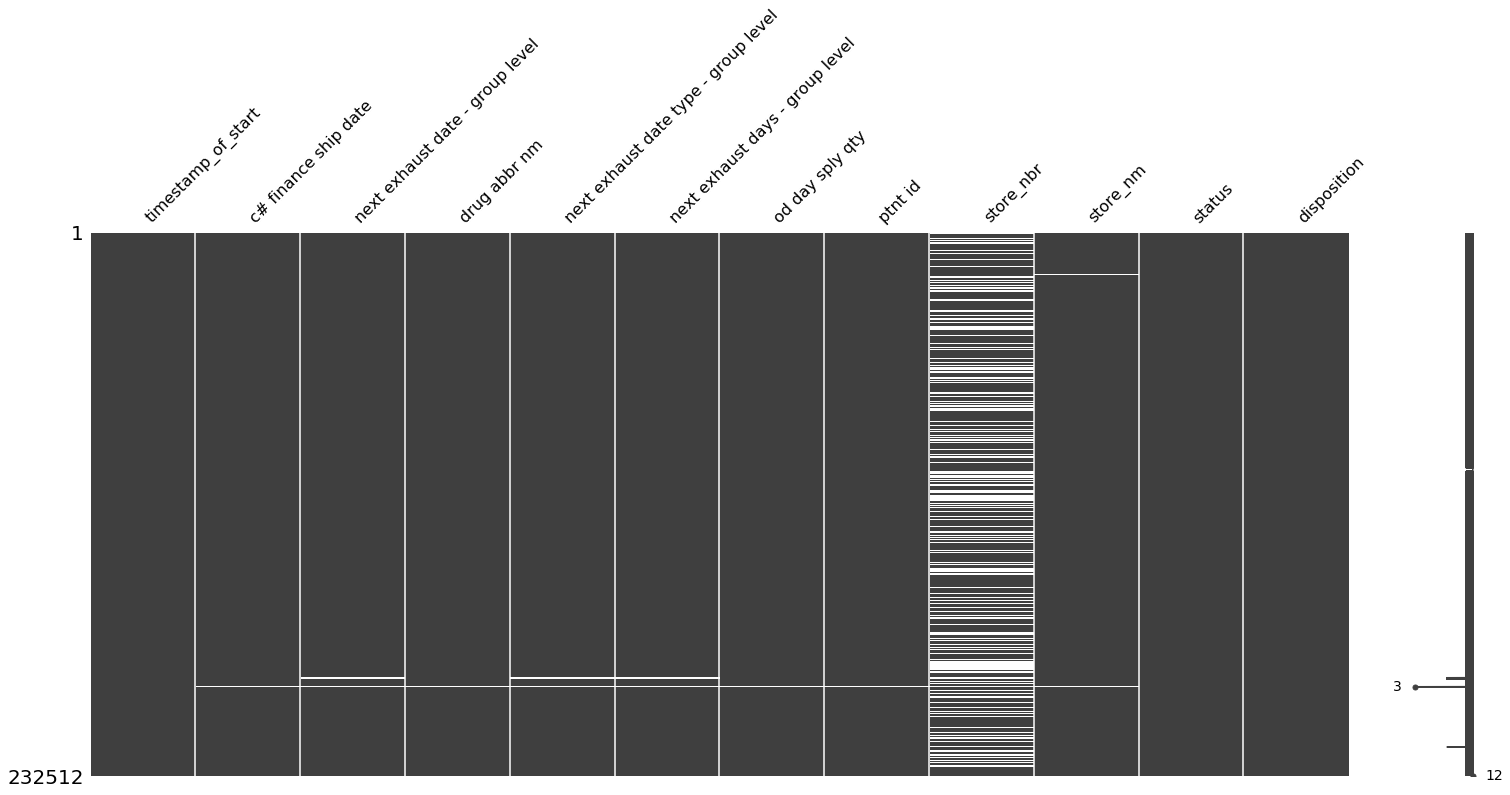

In [70]:
msno.matrix(df)
plt.show()

In [74]:
obs_removed = df.shape[0] - df.dropna(subset = ['next exhaust date - group level', 
                    'next exhaust date type - group level', 
                    'next exhaust days - group level', 'ptnt id']).shape[0]

print(f'{obs_removed} rows are deleted')

df = df.dropna(subset = ['next exhaust date - group level', 
                    'next exhaust date type - group level', 
                    'next exhaust days - group level', 'ptnt id'])

559 rows are deleted


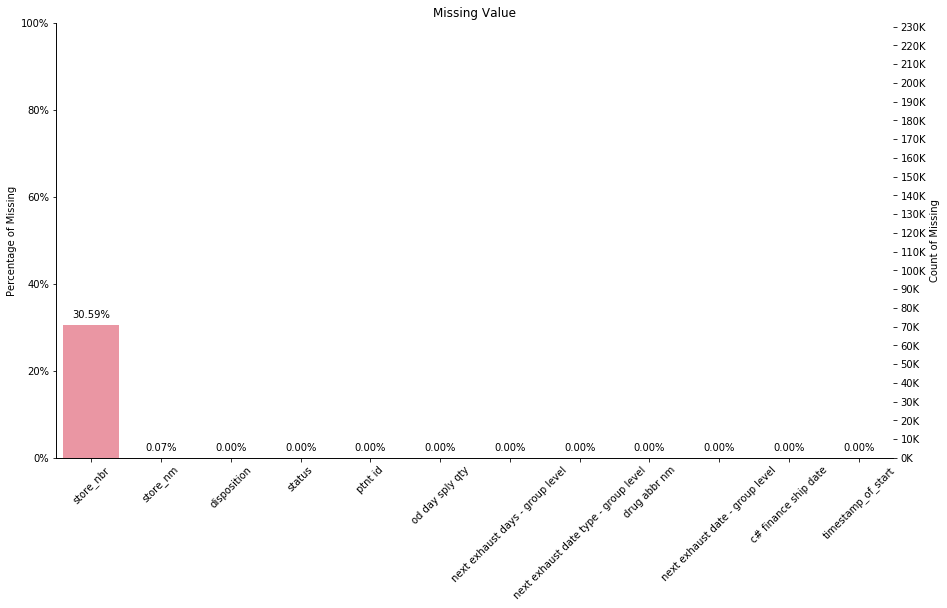

In [75]:
plot_missing(df)

In [76]:
def plot_time(col):
    plt.figure(figsize = (15,8))
    df[col].value_counts().sort_index().plot()
    plt.title(str(col) + ' Count')
    sns.despine()
    plt.show()

In [77]:
def plot_unique(col): 
    
    fig, ax = plt.subplots(figsize = (15,8))
    
    ax = df[col].value_counts().plot(kind = 'bar')
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    plt.title('Countplot of {}'.format(col))
    sns.despine()
    plt.show()

In [78]:
# Check if is a number
def is_number(s):
    try:
        float(s)
        return True
    except:
        return False

In [79]:
# get rid of spaces
def strip(col):
    return df[col].apply(lambda x: x.strip())

#### `timestamp_of_start`

In [80]:
df.timestamp_of_start = df.timestamp_of_start.apply(lambda x: str(x).strip())
df[df.timestamp_of_start == ''].T.head(5)
# Remove 5 rows where the timestamp is '', this is not null
df = df[df.timestamp_of_start != '']

In [81]:
# format to datetime
df.timestamp_of_start = df.timestamp_of_start.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

#### `C# finance ship date` and `next exhaust date`

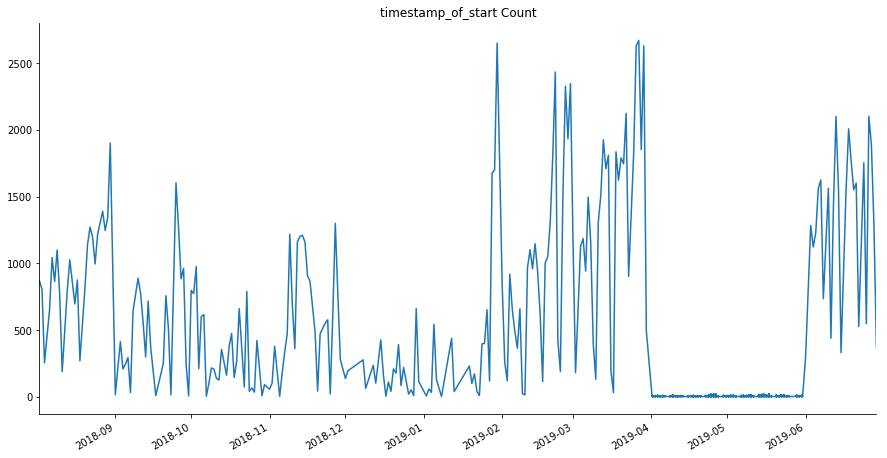

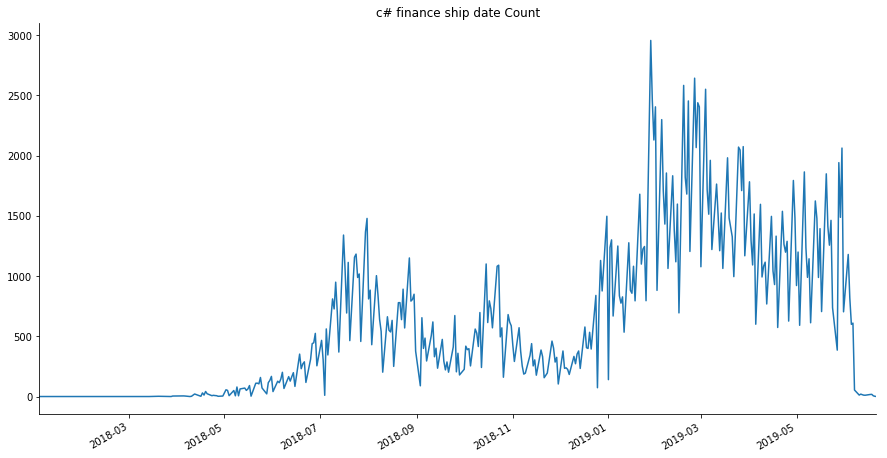

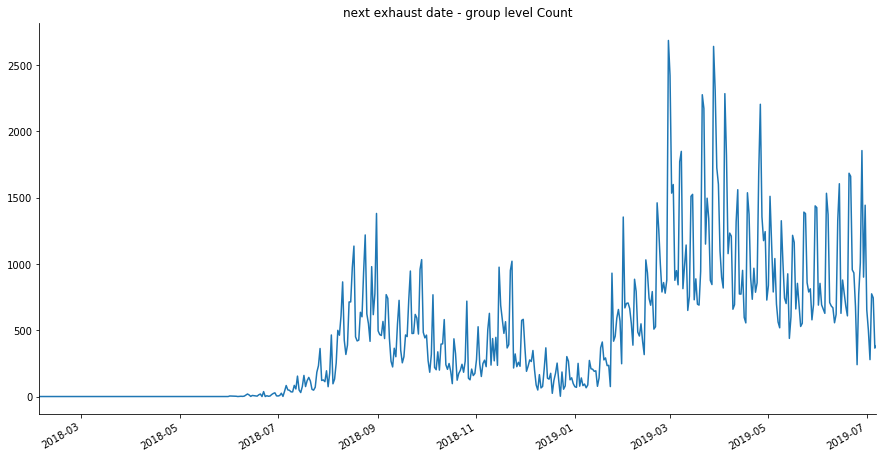

In [82]:
date_cols = df.select_dtypes('datetime').columns.tolist()
for col in date_cols:
    plot_time(col)

#### drug abbr nm

In [83]:
df['drug abbr nm'] = strip('drug abbr nm')

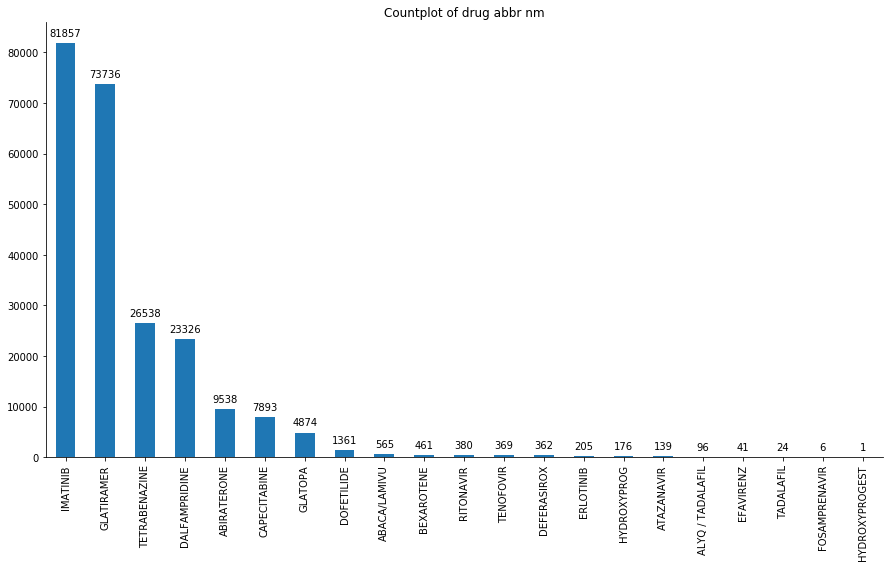

In [84]:
plot_unique('drug abbr nm')

#### `next exhaust date type`

In [85]:
# get rid of invalid input (some numbers) and ' ' spaces
df = df[~df['next exhaust date type - group level'].apply(is_number)]

In [86]:
df['next exhaust date type - group level'] = strip('next exhaust date type - group level')

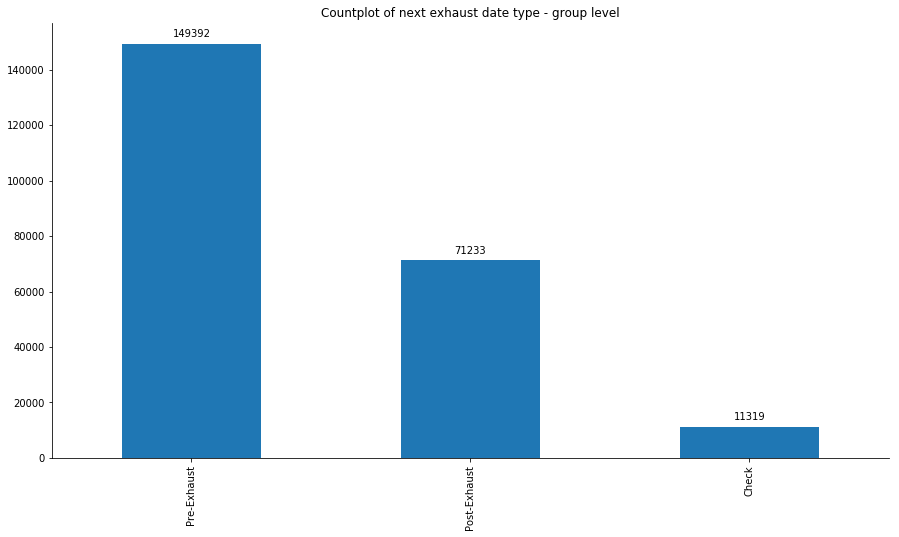

In [87]:
plot_unique('next exhaust date type - group level')

#### `status`

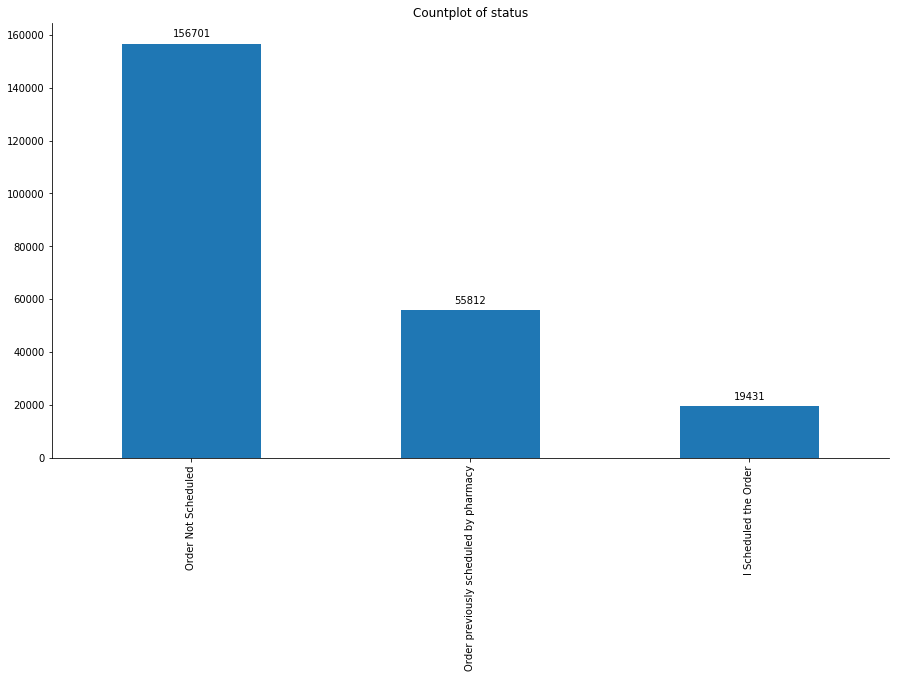

In [88]:
df['status'] = strip('status')
plot_unique('status')

#### `disposition`

In [89]:
df['disposition'] = strip('disposition')

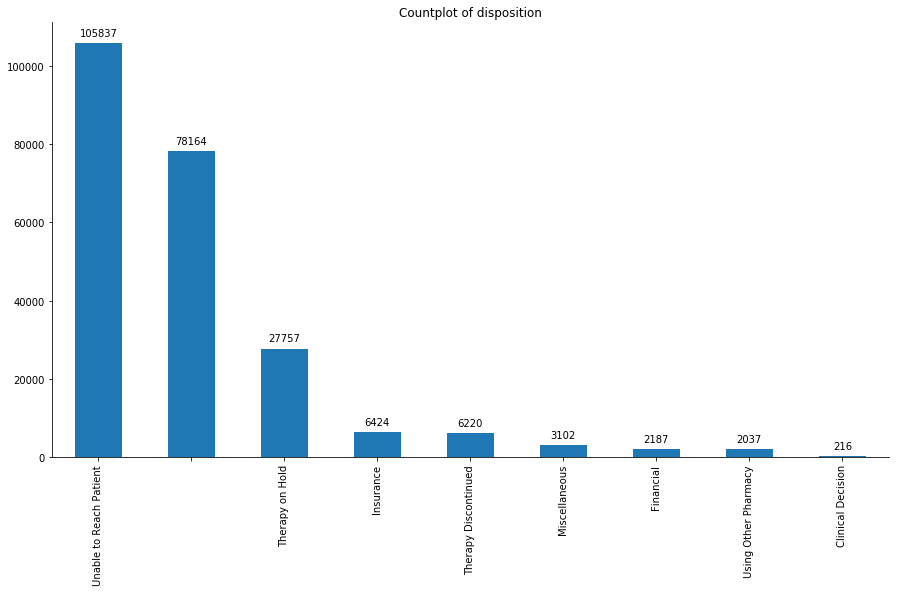

In [90]:
plot_unique('disposition')

#### `od day sply qty`

In [91]:
df['od day sply qty'] = df['od day sply qty'].astype('int')

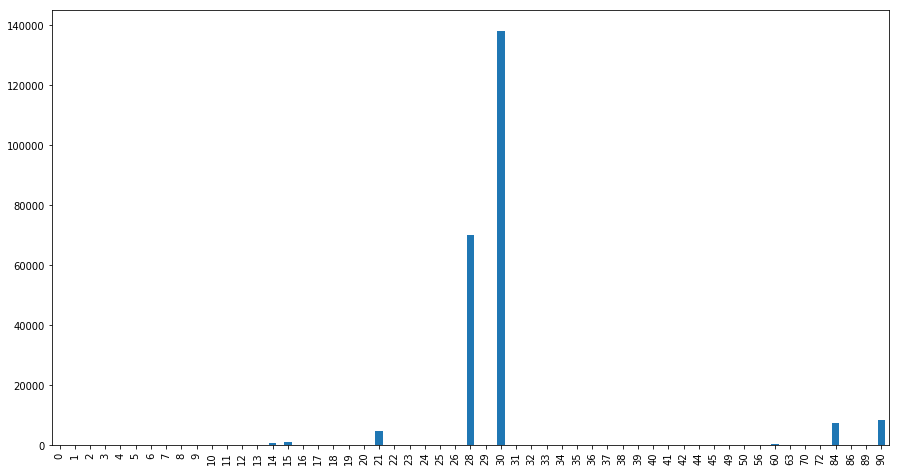

In [92]:
fig, ax = plt.subplots(figsize = (15,8))
ax = df['od day sply qty'].value_counts().sort_index().plot(kind = 'bar')
# ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])
plt.show()

#### `store_nbr` and `store_nm`

In [93]:
df.store_nbr.unique().tolist()

[1703,
 1702,
 2921,
 nan,
 48023,
 48045,
 48036,
 48031,
 48040,
 48050,
 datetime.datetime(2019, 3, 13, 0, 0),
 datetime.datetime(2019, 3, 25, 0, 0),
 datetime.datetime(2019, 4, 4, 0, 0),
 datetime.datetime(2019, 3, 28, 0, 0),
 datetime.datetime(2019, 3, 26, 0, 0),
 datetime.datetime(2019, 3, 11, 0, 0),
 datetime.datetime(2019, 3, 22, 0, 0),
 datetime.datetime(2019, 3, 21, 0, 0),
 'MEDICARE',
 datetime.datetime(2019, 3, 27, 0, 0),
 datetime.datetime(2019, 3, 20, 0, 0),
 datetime.datetime(2019, 3, 15, 0, 0),
 datetime.datetime(2019, 3, 19, 0, 0),
 'OTHER',
 datetime.datetime(2019, 3, 12, 0, 0),
 datetime.datetime(2019, 3, 23, 0, 0),
 28105,
 datetime.datetime(2019, 1, 29, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 3, 17, 0, 0),
 99204,
 32822,
 datetime.datetime(2019, 3, 8, 0, 0),
 datetime.datetime(2019, 3, 16, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0),
 datetime.datetime(2019, 3, 29, 0, 0),
 datetime.datetime(2019, 3, 14, 0, 0),
 datetime.datetime(201

In [94]:
df = df[df.store_nbr.apply(is_number)]

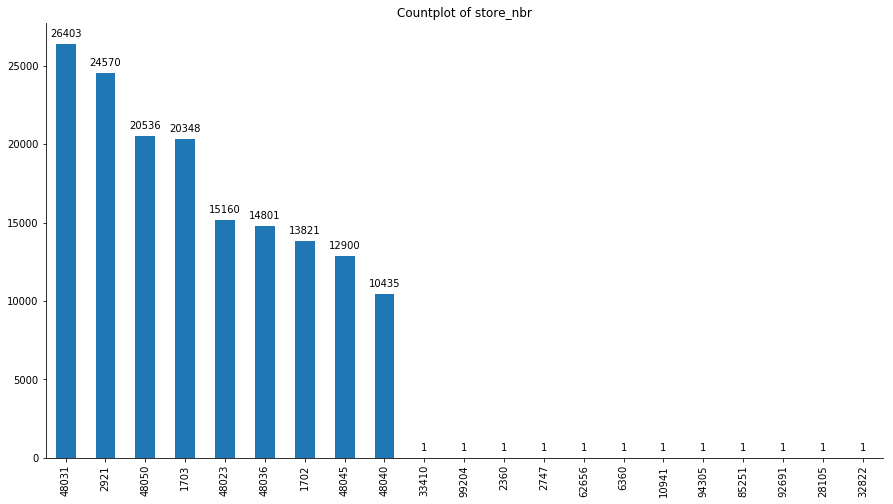

In [95]:
plot_unique('store_nbr')

In [96]:
df.store_nm.value_counts()

FAIRFIELD                                             25607
FAIRFIELD                                             24904
MONROEVILLE                                           13288
MOUNT PROSPECT                                        11516
MONROEVILLE                                           11282
BARTLETT                                              10832
FLOWER MOUND                                          10824
MOUNT PROSPECT                                        10672
REDLANDS                                              10244
REDLANDS                                              10104
BARTLETT                                               9704
FLOWER MOUND                                           9606
MILFORD                                                7928
LENEXA                                                 7702
TAMPA                                                  7678
TAMPA                                                  7482
MILFORD                                 

In [97]:
df = df[(df.store_nm != 45409) & (df.store_nm != 'OTHER') & (df.store_nm != 'MEDICARE')]

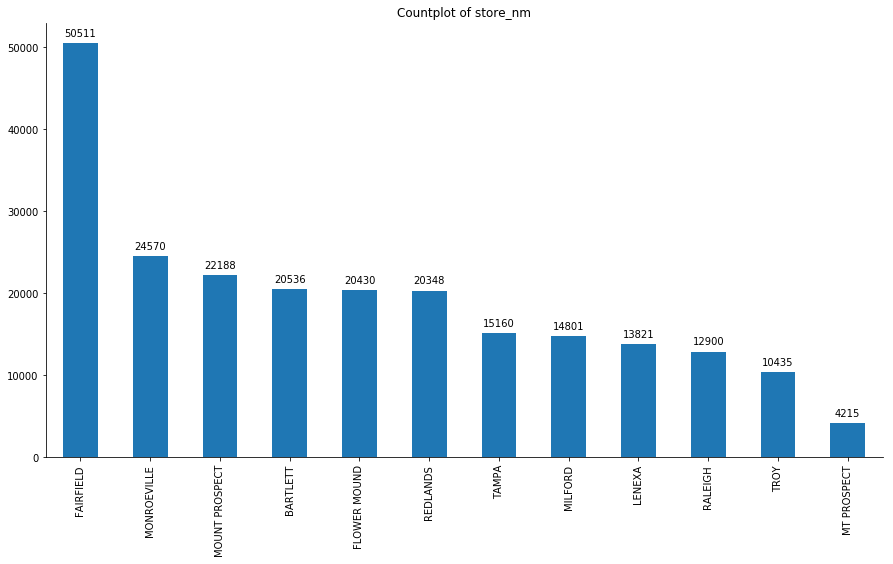

In [98]:
df['store_nm'] = strip('store_nm')
plot_unique('store_nm')

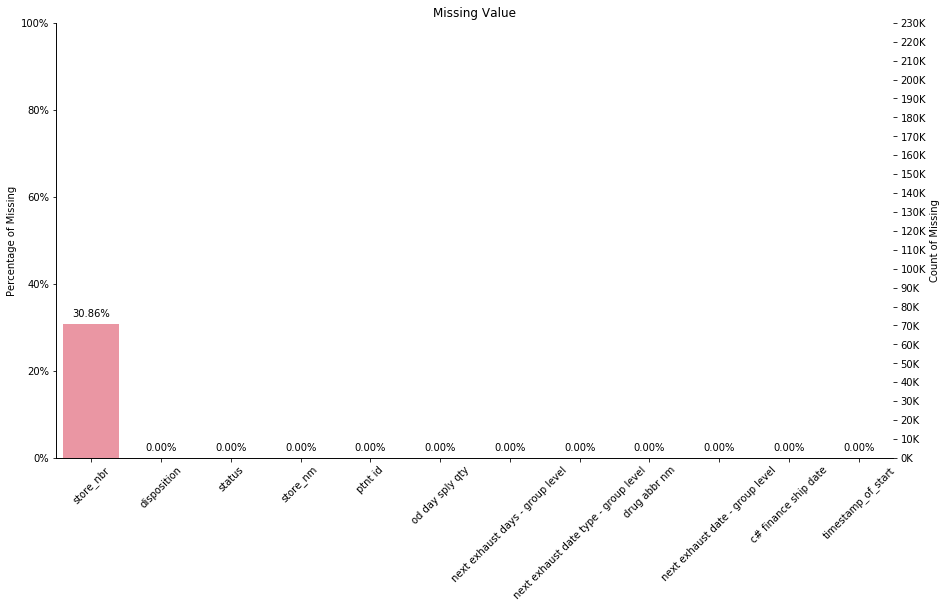

In [99]:
plot_missing(df)

#### Dedupe

In [100]:
cols = df.columns.tolist()
cols.remove('store_nbr')

In [101]:
print('Deleted {} rows'.format(df.shape[0] - df.drop_duplicates(subset = cols).shape[0]))
df = df.drop_duplicates(subset = cols)

Deleted 1314 rows


* There are 1314 duplicates

In [103]:
# Check if data types are correct
df.dtypes

timestamp_of_start                      datetime64[ns]
c# finance ship date                    datetime64[ns]
next exhaust date - group level         datetime64[ns]
drug abbr nm                                    object
next exhaust date type - group level            object
next exhaust days - group level                 object
od day sply qty                                  int32
ptnt id                                         object
store_nbr                                       object
store_nm                                        object
status                                          object
disposition                                     object
dtype: object

#### Save to CSV

In [111]:
# df.to_csv(os.getcwd() + '\data' + '\gao_final.csv', index = False)

In [113]:
# df.to_excel(os.getcwd() + '\data' + '\gao_final.xlsx', index = False)

In [145]:
df.shape

(228601, 12)

In [146]:
df.head()

,timestamp_of_start,c# finance ship date,next exhaust date - group level,drug abbr nm,next exhaust date type - group level,next exhaust days - group level,od day sply qty,ptnt id,store_nbr,store_nm,status,disposition
0,2019-04-01 08:19:00,2019-02-28,2019-03-29,GLATOPA,Post-Exhaust,1,28,3604516,1703,REDLANDS,Order Not Scheduled,Unable to Reach Patient
1,2019-04-01 08:03:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28,4531884,1702,LENEXA,I Scheduled the Order,
2,2019-04-01 07:30:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28,3985037,2921,MONROEVILLE,Order Not Scheduled,Clinical Decision
3,2019-04-01 07:05:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28,4576331,1702,LENEXA,Order Not Scheduled,Unable to Reach Patient
4,2019-04-01 07:11:00,2019-03-11,2019-04-09,GLATIRAMER,Pre-Exhaust,-10,28,2936622,NaN,FLOWER MOUND,Order Not Scheduled,Unable to Reach Patient


In [4]:
os.getcwd()

'C:\\Users\\C092329\\Desktop\\GAO_Folder'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '1_Generics_Model_Data.sql',
 '2_Historical_Reference_Data.sql',
 '3_MPR_Data.sql',
 '4_Imputation_Final_Data.sql',
 'data',
 'doc',
 'gao_NLP.ipynb',
 'Generics Adherence Optimization.ipynb',
 'img',
 'Teradata Connection.ipynb']

In [7]:
df = pd.read_csv(os.getcwd() + '\data\gao_final.csv')

In [14]:
df.status.value_counts()

Order Not Scheduled                       154176
Order previously scheduled by pharmacy     55187
I Scheduled the Order                      19238
Name: status, dtype: int64